In [2]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

def detach_loss(stats): 
  return [loss.detach().cpu().numpy().item() for loss in stats]

def plot_train_val_loss(stats_dict):
  fig, ax = plt.subplots(1,1, figsize = (6, 4))
  train_loss = detach_loss(stats_dict["train"]["loss"])
  val_loss = detach_loss(stats_dict["val"]["loss"])
  idx = np.arange(0, len(train_loss), 1)
  ax.plot(idx, train_loss, label = "train")
  ax.plot(idx, val_loss, label = "val")
  ax.legend()
  plt.show()

def plot_recall(stats_dict):
  fig, ax = plt.subplots(1,1, figsize = (6, 4))
  recall = stats_dict["val"]["recall"]
  idx = np.arange(0, len(recall), 1)
  ax.plot(idx, recall, label = "recall")
  ax.legend()
  plt.show()

Conv Layer: LGC, Neg Samp: random


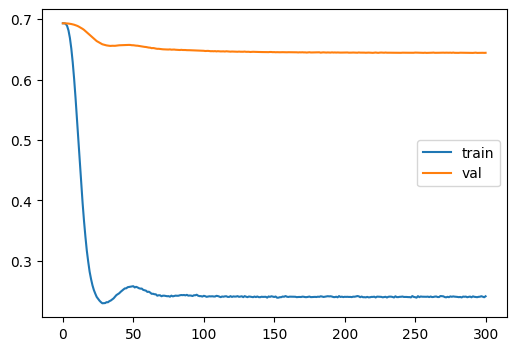

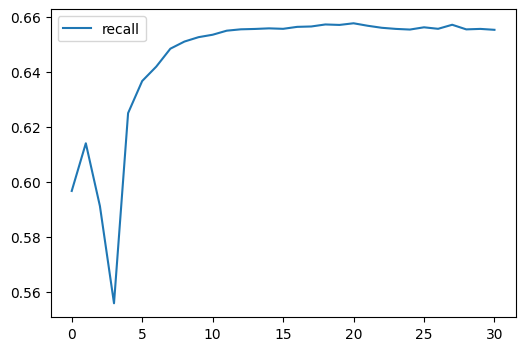

Conv Layer: LGC, Neg Samp: hard


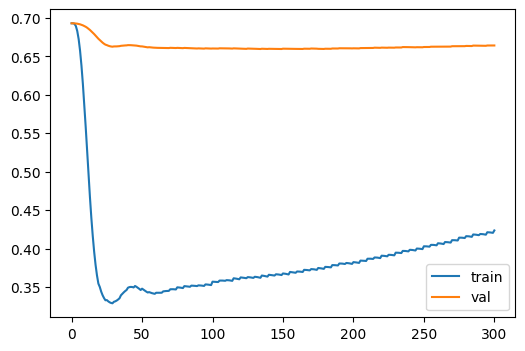

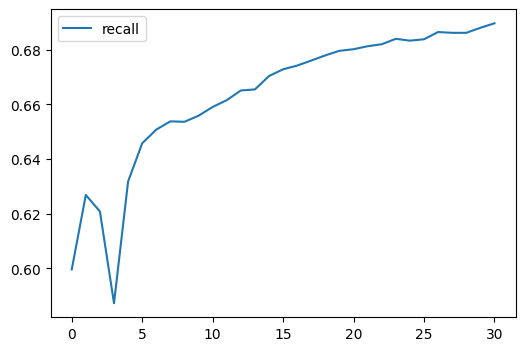

Conv Layer: GAT, Neg Samp: random


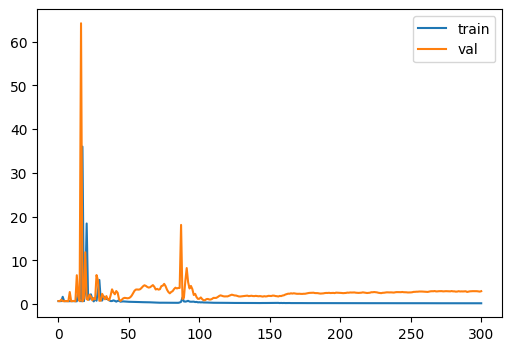

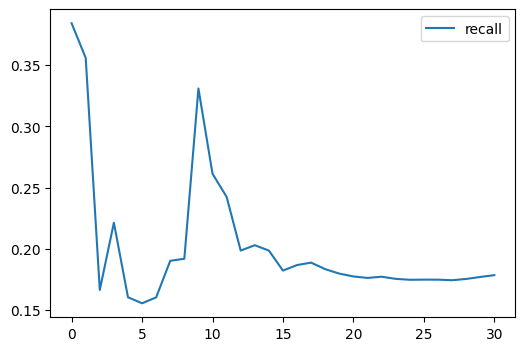

Conv Layer: GAT, Neg Samp: hard


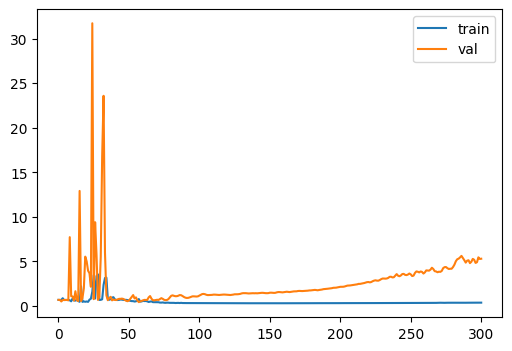

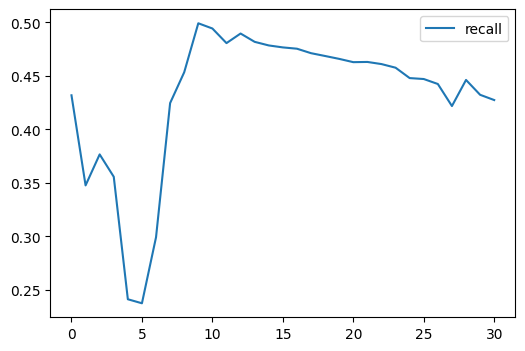

Conv Layer: SAGE, Neg Samp: random


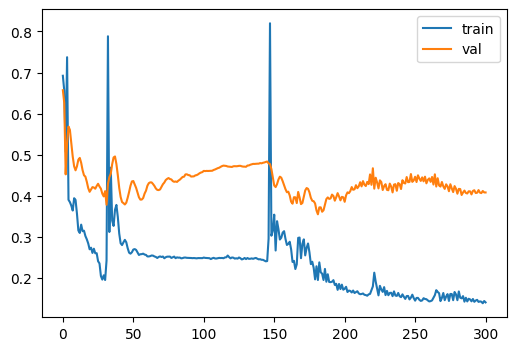

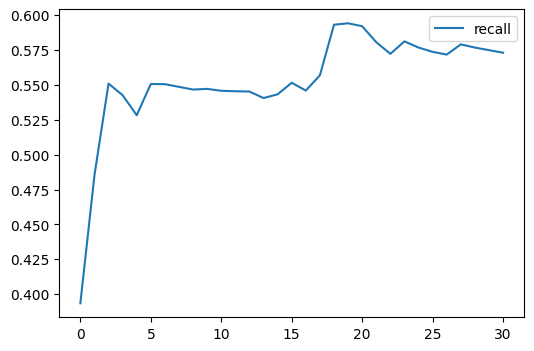

Conv Layer: SAGE, Neg Samp: hard


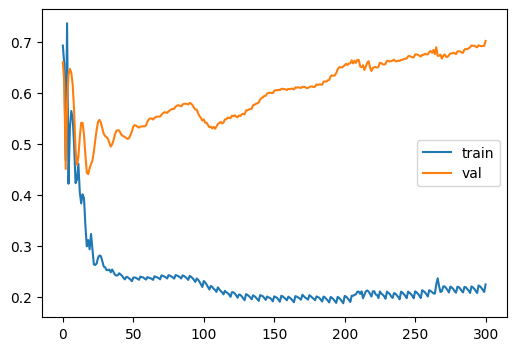

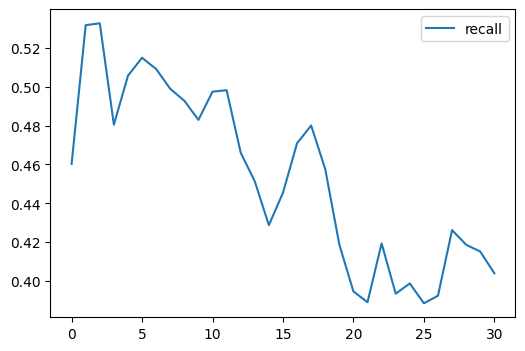

In [4]:
conv_layers = ["LGC", "GAT", "SAGE"]
neg_samps = ["random", "hard"]


for conv_layer in conv_layers:
    for neg_samp in neg_samps:
        stats = pickle.load(open(f"../model_stats/LGCN_{conv_layer}_4_e64_nodes17738__BPR_{neg_samp}.pkl", "rb"))
        print(f"Conv Layer: {conv_layer}, Neg Samp: {neg_samp}")
        plot_train_val_loss(stats)
        plot_recall(stats)
